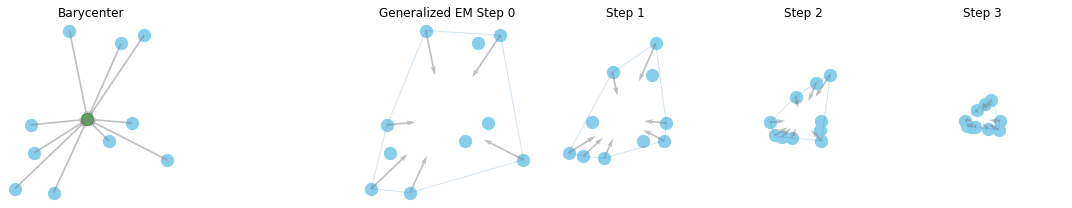

In [25]:
import pandas as pd
import numpy as np
import pylab as pl
import numpy.random as nr
from scipy.spatial import ConvexHull

size=150
n=10
cvxalfa = 0.2
cvxlw = 1

baryalfa = 0.1

# Create a dataframe
nr.seed(43)
x=nr.rand(n)
y=nr.rand(n)
df = pd.DataFrame({'x':x, 'y':y})
b_df = pd.DataFrame({'x':[np.mean(x)]*n, 'y':[np.mean(y)]*n})

k = 6
ax = pl.subplot(1,k,1)
_x = pl.subplot(1,k,2)
bx = pl.subplot(1,k,3)
cx = pl.subplot(1,k,4)
dx = pl.subplot(1,k,5)
ex = pl.subplot(1,k,6)


# plot the dataframe
df.plot(kind='scatter', x='x', y='y', color='skyblue', alpha=1, figsize=(8, 6), s=size, ax=ax)
b_df.plot(kind='scatter', x='x', y='y', color='green', alpha=baryalfa, ax=ax,s=size)

# plot the arrows
V = b_df.y-df.y
U = b_df.x-df.x
ax.quiver(df.x, df.y, U, V, width=0.01, alpha=0.5,color='gray', angles='xy', scale_units='xy', scale=1.)
ax.set_title('Barycenter')


#######
# step 1
def mkcvxplot(ax, df, stepnum):
    hull = ConvexHull(list(zip(df['x'], df['y'])))
    vert = list(hull.vertices)

    # plot the dataframe
    df.plot(kind='scatter', x='x', y='y', color='skyblue', alpha=1, figsize=(8, 6), s=size, ax=ax)

    # plot the arrows
    V = b_df.y-df.iloc[vert].y
    U = b_df.x-df.iloc[vert].x
    ax.quiver(df.x, df.y, U, V, width=0.01, alpha=0.5,color='gray', angles='xy', scale_units='xy', scale=2.)
    if stepnum == 0:
        ax.set_title(r'Generalized EM Step 0')
    else:
        ax.set_title(f'Step {stepnum}')

    _vert = vert+[vert[0]]
    ax.plot(df.iloc[_vert].x, df.iloc[_vert].y, lw=cvxlw, alpha=cvxalfa)
    ax.axis('off')
    for idx in vert:
        df.iloc[vert] = l * df.iloc[vert]+b_df.iloc[vert]*(1-l)




for i,_x in zip(range(4), [bx,cx,dx,ex]):
    mkcvxplot(_x,df,i)

xlim = ax.get_xlim()
ylim = bx.get_ylim()
for _ in pl.gcf().get_axes(): _.set_xlim(xlim); _.set_ylim(ylim); _.axis('off')


pl.gcf().set_size_inches(15, 3)
pl.tight_layout()

pl.savefig('bary-gem-step.pdf')